<a href="https://colab.research.google.com/github/ManuelMorenoNeria/NeuralNetworks/blob/main/Learning2EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step


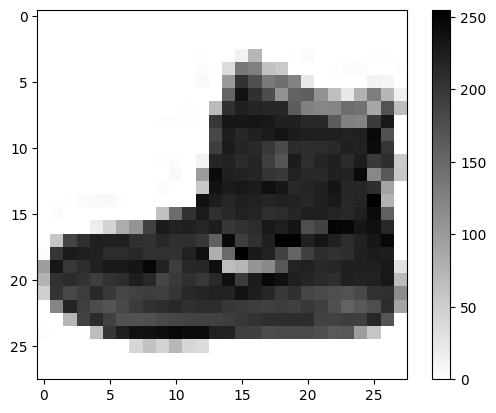

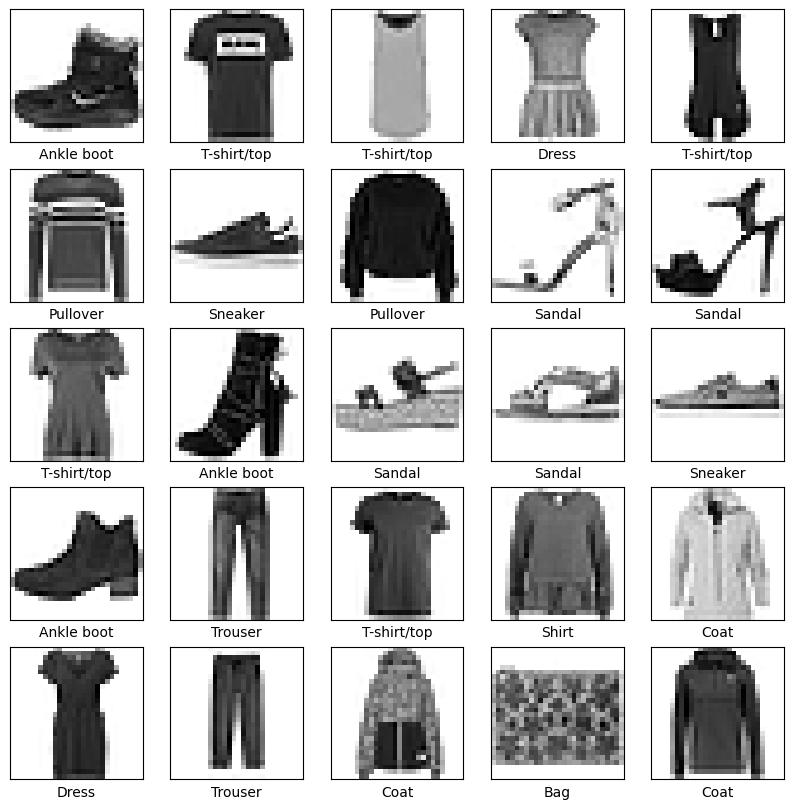

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5014 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3758 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3364 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3128 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2943 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2794 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2676 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2582 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2470 - accuracy: 0.9080
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


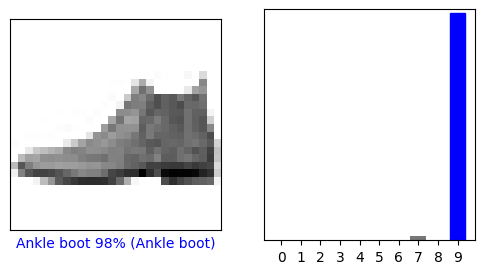

In [4]:
import tensorflow as tf
import numpy as np                        # Import necessary libraries
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # Load fashion MNIST dataset

# The model will try to guess what each image represents by comparing the predictions for train_images
# with the labels in train_labels, and learning from it.
# Once trained, the program will do the same with test_images and test_labels to evaluate its performance.
# Each image is mapped to a single label (0-9). Since class names are not included in the dataset, we add them ourselves.

class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()                                        # Create an empty figure in Matplotlib
plt.imshow(train_images[0], cmap=plt.cm.binary)     # Display the 1st image of the training dataset. The second attribute is to display it in black and white.
plt.colorbar()                                      # Add a color bar on the side to see the relationship between pixel values and colors
plt.show()                                          # Show the image on the screen
train_images = train_images / 255.0                 # To help the neural network better understand the data, we scale pixel values from 0-255 to 0-1
test_images = test_images / 255.0
plt.figure(figsize=(10,10)) # Create an empty figure in Matplotlib with sufficient size to fit the following
# Take the first 25 training images
for i in range(25):
    plt.subplot(5,5,i+1)                            # Subplot divides a figure into smaller parts to display different images within one figure.
    plt.xticks([])                                  # Remove x and y axis ticks
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Show the image in black and white
    plt.xlabel(class_names[train_labels[i]])        # Add the label name below the image
plt.show()                                          # Show the figure
model = tf.keras.Sequential([                       # Define the neural network model using a Sequential model
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # This layer flattens the 2D image into a 1D vector
    tf.keras.layers.Dense(128, activation='relu'),  # Layer with 128 neurons and ReLU activation function to mitigate vanishing gradient problem
    tf.keras.layers.Dense(10)                       # Output layer with 10 neurons, one for each class
])
model.compile(optimizer='adam',                                                      # Compile the model Specifying the optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Loss function
              metrics=['accuracy'])                                                  # Metric used to evaluate performance

model.fit(train_images, train_labels, epochs=10)                                     # Train the model using the training data for 10 epochs to improve performance
# Create a probability model which is a Sequential model composed of:
probability_model = tf.keras.Sequential([model,                       # the model we created before to train the neural network
                                         tf.keras.layers.Softmax()])  # and a Softmax activation layer that transforms the outputs into probabilities
predictions = probability_model.predict(test_images)                  # Use .predict on the last model to make predictions on test_images
# Visualization of results
predictions[0]
np.argmax(predictions[0])
test_labels[0]
# Function to plot an image
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array) # Get the predicted label using argmax function
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # Add labels below the image indicating the predicted class, confidence, and true label
    plt.xlabel(class_names[predicted_label]                                 # Predicted class
               + ' ' + str(int(100 * np.max(predictions_array))) + '% (' +  # Confidence in the prediction
               class_names[true_label] + ')',                               # True label
               color=color)
# Function to plot the probability values
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")  # Create a bar chart with prediction probabilities for the 10 clothing classes
    plt.ylim([0, 1])                                                   # Set the range of the axis between 0 and 1 to represent probabilities
    predicted_label = np.argmax(predictions_array)                     # Get the predicted class by calculating the index of the maximum
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)                                                     # Divides the figure into one row and two columns, and select the first column
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)                                                     # Divides the figure into one row and two columns, and select the second column
plot_value_array(i, predictions[i],  test_labels)
plt.show()
